In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import tweepy

# A.Data Gathering

>### 1. Importing of Dataset Using `Pandas` library

In [2]:
# Importing The Dataset
df_tw = pd.read_csv('twitter-archive-enhanced.csv')
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> ### 2. Downloading the .tsv file Using `Requests` library

In [3]:
# Requesting for Imgae Prediction file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url)
url_content = req.content
img_pred = open('image-predictions.tsv', 'wb')

img_pred.write(url_content)
img_pred.close()

In [4]:
# Importing the downloaded file
img_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ### 3. Authentication & Collection of twitter_id, fovourite and retweet counts Using `tweepy` library

In [6]:
# Authentication process for Twitter API

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
# Creating a list of id's from the given dataset (i.e twitter-archive-enhanced.csv)
tweet_id = list(df_tw['tweet_id'])

# Collecting all the twitter_id's, favourite and retweet counts in a list
tweet_list = []

# Collecting all the exception in a list
exp_list = []

with open('tweet_json.txt', 'w') as file:
    for ids in tweet_id:
        try:
            page = api.get_status(ids,tweet_mode='extended')
            json.dump(page._json, file)
            file.write('\n')
            tweet_list.append(ids)
        
        except Exception as e:
            exp_list.append(ids)

In [5]:
# Converting tweet_list into dataframe

df_api = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [6]:
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


# B. Data Accessing

> ### 1. twitter-archive-enhanced Dataset

In [7]:
df_tw.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1494,692568918515392513,NaN,NaN,2016-01-28 04:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's been guarding this pumpk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692568918...,12,10,Chester,None,None,None,None
1361,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,11,10,a,None,None,None,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
219,850145622816686080,NaN,NaN,2017-04-07 00:38:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,None,None,None,None
2042,671538301157904385,NaN,NaN,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,None,None,None,None
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813066809...,12,10,Tyr,None,None,None,None


In [8]:
df_tw.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_tw.shape

(2356, 17)

In [10]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_tw.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_tw.duplicated().sum()

0

In [13]:
df_tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


>> ### `source` Column:

In [14]:
df_tw['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [15]:
df_tw['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [16]:
df_tw['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

>> ### `rating_numerator`  & `rating_denomenator`  column:

In [17]:
df_tw[df_tw['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [18]:
df_tw[df_tw['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [19]:
df_tw['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
df_tw['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

>> ### `name`  column :

In [21]:
df_tw['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [22]:
# Inaccurate Names

none = df_tw[df_tw['name'] == 'None'].shape[0]
a = df_tw[df_tw['name'] == 'a'].shape[0]
an = df_tw[df_tw['name'] == 'an'].shape[0]
All = df_tw[df_tw['name'] == 'all'].shape[0]
one = df_tw[df_tw['name'] == 'one'].shape[0]
print("Number of Rows with name :\nNone : {}\na : {}\nan : {}\nall : {}\none : {}".format(none,a,an,All,one))

Number of Rows with name :
None : 745
a : 55
an : 7
all : 1
one : 4


> ### 2. image-prediction Dataset

In [23]:
img_pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
425,674075285688614912,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1,Airedale,0.305392,True,Kerry_blue_terrier,0.250014,True,Lakeland_terrier,0.188668,True
1459,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True
1061,715200624753819648,https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg,1,Chihuahua,0.956787,True,beagle,0.008383,True,Labrador_retriever,0.008344,True
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,water_buffalo,0.424250,False,kelpie,0.029054,True,Staffordshire_bullterrier,0.028470,True
1120,726828223124897792,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,1,miniature_pinscher,0.255327,True,Border_terrier,0.181279,True,Labrador_retriever,0.125185,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True


In [24]:
img_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
img_pred.shape

(2075, 12)

In [26]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [28]:
img_pred.duplicated().sum()

0

In [29]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> ### 3. Twitter API Dataframe

In [30]:
df_api.sample(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
344,2017-02-10 16:53:37+00:00,830097400375152640,830097400375152640,Meet Samson. He's absolute fluffy perfection. ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830097389742673920, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1855,2015-12-10 17:37:00+00:00,675006312288268288,675006312288268288,Say hello to Mollie. This pic was taken after ...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675006303748665346, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
722,2016-09-26 23:04:13+00:00,780543529827336192,780543529827336192,Here's a perturbed super floof. 12/10 would sn...,False,"[0, 61]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780543507299794944, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1297,2016-03-06 02:46:44+00:00,706310011488698368,706310011488698368,Here's a very sleepy pupper. Thinks it's an ai...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 706310002273869824, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
931,2016-07-09 02:06:27+00:00,751598357617971201,751598357617971200,This is Toby. A cat got his tongue. 13/10 ador...,False,"[0, 53]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 751598350038929408, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
447,2017-01-06 17:33:29+00:00,817423860136083457,817423860136083456,This is Ken. His cheeks are magic. 13/10 (IG: ...,False,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817423809049493505, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
996,2016-06-25 17:31:25+00:00,746757706116112384,746757706116112384,This is Maddie. She gets some wicked air time....,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1428,2016-02-06 00:35:13+00:00,695767669421768709,695767669421768704,If you are aware of who is making these please...,False,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695767665437233153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",6.753494e+17,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1230,2016-03-18 02:46:49+00:00,710658690886586372,710658690886586368,Here's a brigade of puppers. All look very pre...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 710658682619617280, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1525,2016-01-19 01:18:43+00:00,689255633275777024,689255633275777024,This is Ferg. He swallowed a chainsaw. 1 like ...,False,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [31]:
df_api.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2326,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2329,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2330,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [32]:
df_api.shape

(2331, 32)

In [33]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [34]:
df_api.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2331.000000,2331.000000,2196.0,2196.0,2.600000e+01,2.600000e+01
mean,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2708.945946,7574.356928,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4581.213975,11755.599777,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,548.000000,1319.500000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1270.000000,3296.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3148.000000,9275.000000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,77966.000000,156469.000000,0.0,0.0,8.860534e+17,8.860534e+17


## Assessing Report:

### Quality Issues :

#### df_tw:
1. `timestamp` and `retweeted_statue_timestamp` column is not in **datetime** datatype.
2.  `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id` and `retweeted_status_timestamp` has a lot of missing values, might not be needed in analysis.
3. `source`column has **Validity** issue.
4. `raing_numerator` has some unexpected values).
5. `rating_denominator` also has some unexpected values.
6. `name` column has **incorrect names** such as a,an,all...etc and None should be replaced by NaN.'
7. Drop the `expanded_urls` column as it is not required for analysis.
8. Replace all the *None* values with *NaN*.

#### img_pred:
1. `p1` , `p2` , `p3` columns should be **categorical** datatype.

#### df_api:
1. Drop the Unecessary columns and rows.
2. Rename `id` column as `tweet_id`.


* `df_tw` has 2356 rows while `img_pred` has 2075 rows and `df_tw_json` has 2331 rows

### Tideness Issues:

1. Columns like `doggo`, `floofer`, `pupper`, `puppo` should be under one Column (i.e "dog_class").
2. Instead of 3 Dataframe, we should have 1 `Master` dataframe.

# C. Data Cleaning

In [35]:
df_tw_clean = df_tw.copy()
img_pred_clean = img_pred.copy()
df_api_clean = df_api.copy()

## Quality Issue:

`df_tw` : **timestamp and retweeted_statue_timestamp column is not in datetime datatype.**

`img_pred` : **p1, p2, p3 columns should be catgorical datatype.**

#### Define : 

We'll Use the `.astype()` function for the conversion of datatypes.

#### Code:

In [36]:
# To Timestamp

df_tw_clean['timestamp'] = pd.to_datetime(df_tw_clean['timestamp'])
df_tw_clean['retweeted_status_timestamp'] = pd.to_datetime(df_tw_clean['retweeted_status_timestamp'])

# To category

img_pred_clean['p1'] = img_pred_clean['p1'].astype('category')
img_pred_clean['p2'] = img_pred_clean['p2'].astype('category')
img_pred_clean['p3'] = img_pred_clean['p3'].astype('category')

#### Test:

In [37]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [38]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   int64   
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   int64   
 3   p1        2075 non-null   category
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   category
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   category
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


`df_tw` : **in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp has a lot of missing values, might not be needed in analysis.**

#### Define : 

To Drop these columns we will use `.drop()` function

#### Code:

In [39]:
df_tw_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test:

In [40]:
df_tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [41]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

`df_tw` : **`source`column has Validity issue.**

#### Define:

Replace the old_source values with new_source value.

#### Code:

In [42]:
old_source = df_tw_clean['source'].unique()
old_source

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [43]:
new_source = ['Twitter for iphone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
new_source

['Twitter for iphone',
 'Twitter Web Client',
 'Vine - Make a Scene',
 'TweetDeck']

In [44]:
df_tw_clean['source'] = df_tw_clean['source'].replace(old_source,new_source)

#### Test:

In [45]:
df_tw_clean['source'].value_counts()

Twitter for iphone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

`df_tw` : **`name` column has incorrect names such as a,an,all...etc.**

#### Define:

* Create a list of names to iterate and replace any lower case Character with `None`
* Replace *None* with *NaN*.

#### Code:

In [46]:
# Creating a list from names of the df_tw_clean dataframe
names = list(df_tw_clean['name'])

# Implementing .replace Function 
for i in names:
    if i[0].islower() == True:
        df_tw_clean['name'] = df_tw_clean['name'].replace(i,"None")

#### Test:

In [47]:
df_tw_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

In [48]:
df_tw_clean.query('name == "a" or name == "an" or name == "all" or name == "one"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`df_tw` : **`raing_numerator` has some unexpected values**


`df_tw` : **`raing_denominator` also has some unexpected values**

#### Define:

* Replace all the Typing mistakes with Valid Numbers.
* Remove all the extreme and zero values from Numerator and Denominator.

#### Code:

In [49]:
# Replacing Numerator with 10 and Denominator with 10
df_tw_clean['rating_numerator'] = df_tw_clean['rating_numerator'].replace(50,10)
df_tw_clean['rating_denominator'] = df_tw_clean['rating_denominator'].replace(50,10)

# Replacing Numerator with 11 and Denominator with 10
df_tw_clean['rating_numerator'] = df_tw_clean['rating_numerator'].replace(88,11)
df_tw_clean['rating_denominator'] = df_tw_clean['rating_denominator'].replace(80,10)

# Replacing Numerator with 10 and Denominator with 11
df_tw_clean['rating_numerator'] = df_tw_clean['rating_numerator'].replace(80,10)
df_tw_clean['rating_denominator'] = df_tw_clean['rating_denominator'].replace(88,11)

# Replacing Numerator with 11 and Denominator with 10
df_tw_clean['rating_numerator'] = df_tw_clean['rating_numerator'].replace(44,11)
df_tw_clean['rating_denominator'] = df_tw_clean['rating_denominator'].replace(40,10)

In [50]:
# Removing all the extreme and zero values from Numerator and Denominator columns.
df_tw_clean = df_tw_clean[df_tw_clean['rating_numerator'] != 0 ]

df_tw_clean = df_tw_clean[df_tw_clean['rating_denominator'] >= 10 ]

df_tw_clean = df_tw_clean[df_tw_clean['rating_numerator'] <= 20 ]

df_tw_clean = df_tw_clean[df_tw_clean['rating_denominator'] < 20 ]

#### Test:

In [51]:
df_tw_clean[df_tw_clean['rating_numerator'] == 50]
df_tw_clean[df_tw_clean['rating_denominator'] == 50]

df_tw_clean[df_tw_clean['rating_numerator'] == 88]
df_tw_clean[df_tw_clean['rating_denominator'] == 80]

df_tw_clean[df_tw_clean['rating_numerator'] == 80]
df_tw_clean[df_tw_clean['rating_denominator'] == 88]

df_tw_clean[df_tw_clean['rating_numerator'] == 44]
df_tw_clean[df_tw_clean['rating_denominator'] == 40]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
len(df_tw_clean[df_tw_clean['rating_numerator'] != 0 ])

2331

In [53]:
len(df_tw_clean[df_tw_clean['rating_denominator'] >= 10 ])

2331

In [54]:
len(df_tw_clean[df_tw_clean['rating_numerator'] <= 20 ])

2331

In [55]:
len(df_tw_clean[df_tw_clean['rating_denominator'] < 20 ])

2331

In [56]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2331 non-null   int64              
 1   timestamp           2331 non-null   datetime64[ns, UTC]
 2   source              2331 non-null   object             
 3   text                2331 non-null   object             
 4   expanded_urls       2277 non-null   object             
 5   rating_numerator    2331 non-null   int64              
 6   rating_denominator  2331 non-null   int64              
 7   name                2331 non-null   object             
 8   doggo               2331 non-null   object             
 9   floofer             2331 non-null   object             
 10  pupper              2331 non-null   object             
 11  puppo               2331 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [57]:
df_tw_clean['rating_denominator'].unique() , df_tw_clean['rating_numerator'].unique()

(array([10, 15, 11, 16], dtype=int64),
 array([13, 12, 14,  5, 17, 11, 10,  6, 15,  7,  9,  8,  1,  3,  4, 20,  2],
       dtype=int64))

`df_tw` : Drop the `expanded_urls` column as it is not required for analysis.

#### Define

Use the `.drop()` function to drop the `expanded_url` column.

#### Code

In [58]:
df_tw_clean.drop('expanded_urls', axis = 1, inplace = True)

#### Test

In [59]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2331 non-null   int64              
 1   timestamp           2331 non-null   datetime64[ns, UTC]
 2   source              2331 non-null   object             
 3   text                2331 non-null   object             
 4   rating_numerator    2331 non-null   int64              
 5   rating_denominator  2331 non-null   int64              
 6   name                2331 non-null   object             
 7   doggo               2331 non-null   object             
 8   floofer             2331 non-null   object             
 9   pupper              2331 non-null   object             
 10  puppo               2331 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 218.5+ KB


`df_tw` : **Replace all the None values with NaN.**

#### Define:

Use of `.replace()` function to replace all the None Values

#### Code:

In [60]:
# Replacing all the None values with np.NaN

df_tw_clean = df_tw_clean.replace("None",np.NaN)

#### Test:

In [61]:
df_tw_clean.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                   834
doggo                 2234
floofer               2321
pupper                2075
puppo                 2301
dtype: int64

`df_api_clean` : **Drop the Unecessary columns and rows.**

#### Define:

Use the `.drop()` function to drop the unnecessary columns

#### Code:

In [62]:
df_api_clean = df_api_clean.drop(['created_at','id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status','favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'], axis = 1)

#### Test:

In [63]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


`df_api_clean`: **Rename `id` column as `tweet_id`.**

#### Define:

Use `.replace` to rename the column

#### Code:

In [64]:
df_api_clean.rename(columns = {"id" : "tweet_id"},inplace = True)

#### Test:

In [65]:
df_api_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

## Tideness Issue

`df_tw` : **Columns like doggo, floofer, pupper, puppo should be under one Column (i.e "dog_class").**

#### Define :

Use `.melt` function to merge all the three columns as dog_class column

#### Code:

In [66]:
df_tw_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [67]:
df_tw_clean = pd.melt(df_tw_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator','rating_denominator',
                                            'name'], var_name='dog_class')

In [68]:
df_tw_clean = df_tw_clean.drop('value',axis = 1)

#### Test:

In [69]:
df_tw_clean.sample(30)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class
6375,679729593985699840,2015-12-23 18:25:38+00:00,Twitter for iphone,This is Hunter. He was playing with his ball m...,8,10,Hunter,pupper
7439,818588835076603904,2017-01-09 22:42:41+00:00,Twitter for iphone,RT @dog_rates: This is Chelsea. She forgot how...,11,10,Chelsea,puppo
7293,836397794269200385,2017-02-28 02:09:08+00:00,Twitter for iphone,RT @dog_rates: This is Buddy. He ran into a gl...,13,10,Buddy,puppo
1705,679877062409191424,2015-12-24 04:11:37+00:00,Twitter for iphone,Meet Penelope. She's a bacon frise. Total babe...,5,10,Penelope,doggo
3862,689255633275777024,2016-01-19 01:18:43+00:00,Vine - Make a Scene,This is Ferg. He swallowed a chainsaw. 1 like ...,10,10,Ferg,floofer
5324,789986466051088384,2016-10-23 00:27:05+00:00,Twitter for iphone,This is Happy. He's a bathtub reviewer. Seems ...,12,10,Happy,pupper
2320,666063827256086533,2015-11-16 01:22:45+00:00,Twitter for iphone,This is the happiest dog you will ever see. Ve...,10,10,NaN,doggo
3635,706310011488698368,2016-03-06 02:46:44+00:00,Twitter for iphone,Here's a very sleepy pupper. Thinks it's an ai...,12,10,NaN,floofer
1503,690690673629138944,2016-01-23 00:21:03+00:00,Twitter for iphone,This is Cedrick. He's a spookster. Did me a di...,10,10,Cedrick,doggo
4462,669603084620980224,2015-11-25 19:46:30+00:00,Twitter for iphone,Very human-like. Cute overbite smile *finger t...,10,10,NaN,floofer


 **Instead of 3 Dataframe, we should have 1 `Master` dataframe.**

#### Define:

* Use `.merge` function to merge all the dataframes
* Use `.drop_duplicates` function to drop all the duplicate ids.

#### Code:

In [70]:
df_master = pd.merge(pd.merge(df_tw_clean,img_pred_clean,on = 'tweet_id'),df_api_clean,on = 'tweet_id')

In [71]:
df_master.drop_duplicates(subset = 'tweet_id',inplace = True)

#### Test:

In [72]:
df_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_class,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7724,36264
4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5706,31273
8,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3782,23541
12,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7877,39561
16,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8494,37779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8140,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iphone,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,doggo,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,39,96
8144,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iphone,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,doggo,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,132,272
8148,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iphone,Here is a very happy pup. Big fan of well-main...,9,10,NaN,doggo,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,41,112
8152,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iphone,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,doggo,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,42,121


In [73]:
df_master['tweet_id'].duplicated().sum()

0

In [74]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 8156
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2040 non-null   int64              
 1   timestamp           2040 non-null   datetime64[ns, UTC]
 2   source              2040 non-null   object             
 3   text                2040 non-null   object             
 4   rating_numerator    2040 non-null   int64              
 5   rating_denominator  2040 non-null   int64              
 6   name                1382 non-null   object             
 7   dog_class           2040 non-null   object             
 8   jpg_url             2040 non-null   object             
 9   img_num             2040 non-null   int64              
 10  p1                  2040 non-null   category           
 11  p1_conf             2040 non-null   float64            
 12  p1_dog              2040 non-null 

#### Converting `df_master` dataframe into `.csv`

In [75]:
df_master.to_csv('WeBreedDogs.csv',index = False)

`

## Visula Analysis On WeRateDogs

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('WeBreedDogs.csv')

### Top 5 Most Twitted Dogs :

In [78]:
df['p1'].value_counts().head(5)

golden_retriever      147
Labrador_retriever     96
Pembroke               88
Chihuahua              81
pug                    57
Name: p1, dtype: int64

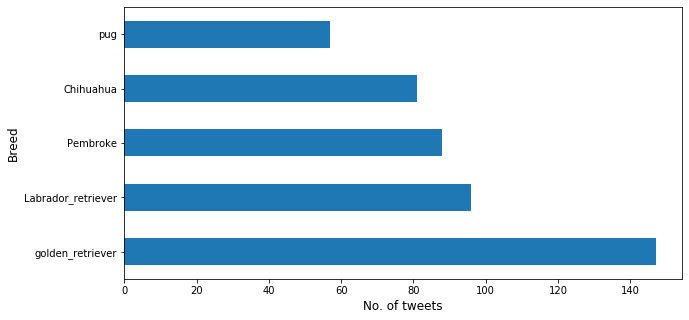

In [77]:
df['p1'].value_counts().head(5).plot(kind ='barh',figsize = (10,5))
plt.xlabel('No. of tweets',size = 12)
plt.ylabel('Breed',size = 12);

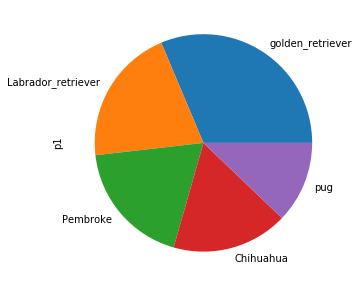

In [79]:
df['p1'].value_counts().head(5).plot(kind ='pie',figsize = (8,5));

### Favourite and Retweet:

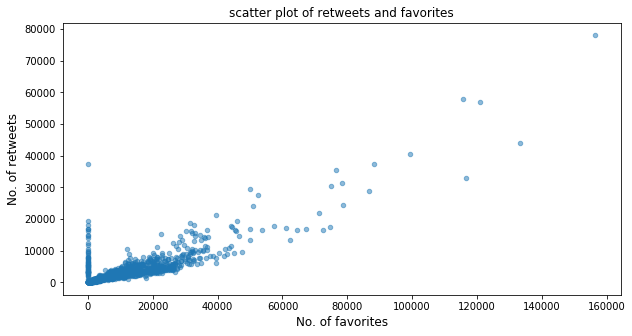

In [81]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5,figsize = (10,5))
plt.xlabel('No. of favorites',size = 12)
plt.ylabel('No. of retweets',size = 12)
plt.title('scatter plot of retweets and favorites',size = 12);

### Top 5 Most Polpular Breed:

In [83]:
new = df[['p1','retweet_count','favorite_count']].sort_values(['retweet_count','favorite_count']).tail(5)
df_new = pd.DataFrame(new)

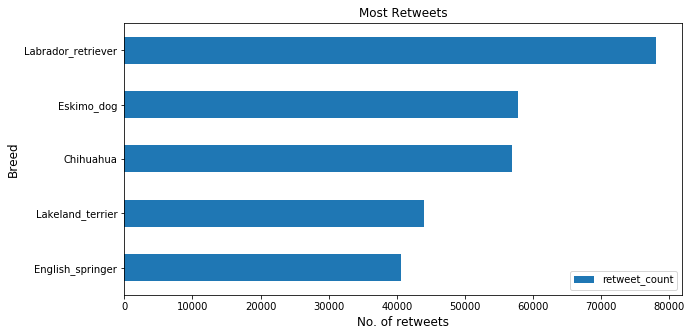

In [84]:
df_new.plot(x = 'p1', y = ['retweet_count'],kind = 'barh',figsize = (10,5))
plt.xlabel('No. of retweets',size = 12)
plt.ylabel('Breed',size = 12)
plt.title('Most Retweets',size = 12);

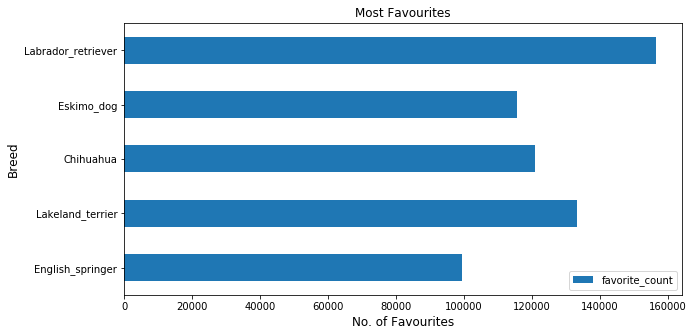

In [85]:
df_new.plot(x = 'p1', y = ['favorite_count'],kind = 'barh',figsize = (10,5))
plt.xlabel('No. of Favourites',size = 12)
plt.ylabel('Breed',size = 12)
plt.title('Most Favourites',size = 12);